# Quantitative Analyses

In [1]:
from skimage.feature import hog
%matplotlib inline

In [2]:
# find one example
import matplotlib.pyplot as plt
import cv2
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from skimage.feature import hog
from skimage import data, exposure

# Quantitative Analyses

In [3]:
train_dir = "/mnt/disks/large/data/original_train/"
data_dir = "/mnt/disks/large/data/"
output_dir = "/home/maxcm/try/CS231N_CZT/data/"

In [4]:
import pandas as pd
train_df = pd.read_csv(data_dir+"train.csv", engine='python')
labels_df = pd.read_csv(data_dir+"labels.csv", engine='python')


In [5]:
proportion = pd.read_csv("/home/maxcm/try/CS231N_CZT/data/train_train_label_proportion.csv")

In [6]:
#np.savetxt("foo1.csv", proportion, delimiter=",")


In [7]:
sorted_prop = proportion.sort_values(by='proportion',ascending=False)
top10_label = sorted_prop['proportion'][:10]
top10_label = list(top10_label.index)

In [8]:
# load data

# test
test_ground_truth = pd.read_csv("/mnt/disks/large/data/train_split/train_split_test.csv")
test_pred = pd.read_csv("/mnt/disks/large/output/cnnrnn_final/test/test-08/test_prediction.csv")
#test_pred = pd.read_csv("/mnt/disks/large/output/cnnrnn_test_cropOnly/test/test-03/dev_prediction.csv")

for idx in range(len(test_pred)):
    if pd.isna(test_pred.iloc[idx,1]):
        test_pred.iloc[idx,1] = '1103'
test_pred.head(10)


,id,attribute_ids
0,1000fe2e667721fe,13 51 111 147 189 501 738 813 1046 1092
1,100b45b7c4020f5d,79 121 188 304 369 489 612 774 813 1039 1059
2,1012a188a1fd6166,13 147 492 698 716 813 896 903 966 1092
3,1014ac8807369589,147 188 369 518 639 671 780 950 1034 1035
4,101695e8cefdc9c4,194 813 1046
5,1018a55fce131346,51 147 156 212 227 489 584 612 671 780 1059
6,101bedd1744689b2,147 189 420 498 663 718 738 800 813 961 1092
7,101c55520bafa9f0,13 480 483 494 501 670 737 738 813 1046
8,10260b5ce69150e3,51 79 147 156 194 212 477 671 780 872 1059
9,1027bc2aeca8e1a8,13 51 147 194 671 698 744 813 1092 1099


In [9]:
test_ground_truth.head(10)

,id,attribute_ids
0,1000fe2e667721fe,51 616 734 813
1,100b45b7c4020f5d,161 489 704 1100
2,1012a188a1fd6166,13 813 896
3,1014ac8807369589,103 180 573
4,101695e8cefdc9c4,13 813
5,1018a55fce131346,156 228 1054
6,101bedd1744689b2,51 339 492 961
7,101c55520bafa9f0,13 501 670 871
8,10260b5ce69150e3,477 671 738 1059
9,1027bc2aeca8e1a8,13 903 1092


In [10]:
def convert_one_hot(train_df):
    train_id_attribute_id_ohe= np.zeros((len(train_df), len(labels_df)), dtype=int)
    for idx, attr_arr in enumerate(train_df.attribute_ids.str.split(" ").apply(lambda l: list(map(int, l))).values):
        if attr_arr != [1103]:
            train_id_attribute_id_ohe[idx, attr_arr] = 1
    train_id_attribute_id_ohe = pd.DataFrame(train_id_attribute_id_ohe,columns=labels_df.attribute_id)
    print(f"one hot encoding done, shape {train_id_attribute_id_ohe.shape}")
    
    return train_id_attribute_id_ohe
    

In [11]:
test_ground_truth_ohe = convert_one_hot(test_ground_truth)
test_pred_ohe = convert_one_hot(test_pred)

one hot encoding done, shape (10920, 1103)
one hot encoding done, shape (10920, 1103)


In [14]:
a=np.zeros((len(labels_df),5))
for ilabel in range(len(labels_df)):
    y_true = test_ground_truth_ohe.iloc[:,ilabel]
    y_pred = test_pred_ohe.iloc[:,ilabel]
    #b=fbeta_score(y_true=y_true, y_pred=y_pred, beta=2, average='samples')
    a[ilabel,0]=fbeta_score(y_true, y_pred, average='macro', beta=2)
    a[ilabel,1]=f1_score(y_true, y_pred, average='macro')
    a[ilabel,2]=precision_score(y_true, y_pred, average='macro')
    a[ilabel,3]=recall_score(y_true, y_pred, average='macro')
    #a[ilabel,4]=accuracy_score(y_true, y_pred)
    a[ilabel,4]=1-np.sum(np.abs(y_true-y_pred))/len(test_ground_truth_ohe)
  


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#np.savetxt("foo.csv", a, delimiter=",")

In [15]:
b=np.zeros((1,5))
y_true = test_ground_truth_ohe.iloc[:,0:398]
y_pred = test_pred_ohe.iloc[:,0:398]
b[0,0]=fbeta_score(y_true, y_pred, average='macro', beta=2)
b[0,1]=f1_score(y_true, y_pred, average='macro')
b[0,2]=precision_score(y_true, y_pred, average='macro')
b[0,3]=recall_score(y_true, y_pred, average='macro')
b[0,4]=np.sum(1-np.sum(np.abs(y_true-y_pred))/len(test_ground_truth_ohe))/398

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [16]:
print(b)

[[0.03961867 0.02912245 0.02584803 0.05879191 0.99188709]]


In [17]:
c=np.zeros((1,5))
y_true = test_ground_truth_ohe.iloc[:,398::]
y_pred = test_pred_ohe.iloc[:,398::]
c[0,0]=fbeta_score(y_true, y_pred, average='macro', beta=2)
c[0,1]=f1_score(y_true, y_pred, average='macro')
c[0,2]=precision_score(y_true, y_pred, average='macro')
c[0,3]=recall_score(y_true, y_pred, average='macro')
c[0,4]=np.sum(1-np.sum(np.abs(y_true-y_pred))/len(test_ground_truth_ohe))/(1103-398)


In [18]:
print(c)

[[0.09012585 0.06319868 0.04890042 0.14199593 0.98984867]]


# Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix
labels = [0, 1]
def cm_plot(class_num, class_name):
    y_true = test_ground_truth_ohe.iloc[:,class_num]
    y_pred = test_pred_ohe.iloc[:,class_num]
    cm = confusion_matrix(y_true, y_pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm,cmap='YlGn')
    plt.title('Confusion matrix for label \'tag::'+str(class_name)+'\'\n')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Groud Truth')
    plt.show()
    return

[[5385 3649]
 [ 156 1730]]


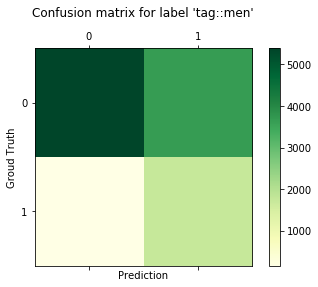

In [19]:
cm_plot(813,'men')

[[5911 3563]
 [ 163 1283]]


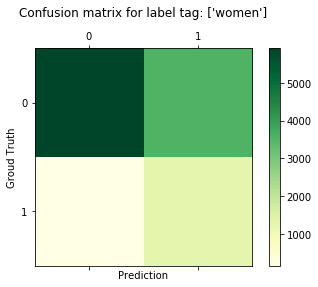

In [46]:
cm_plot(1092,'women')

[[10869    27]
 [   19     5]]


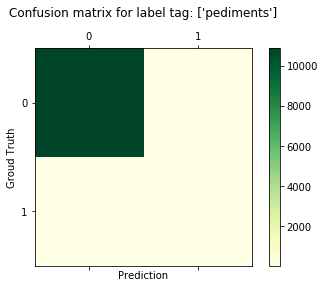

In [47]:
cm_plot(871,'pediments')

[[10904     0]
 [   16     0]]


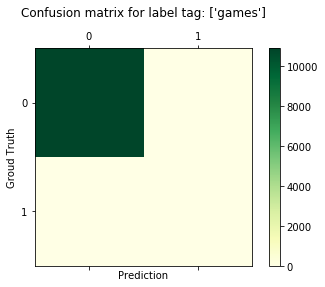

In [48]:
cm_plot(688,'games')

[[8406 1587]
 [ 125  802]]


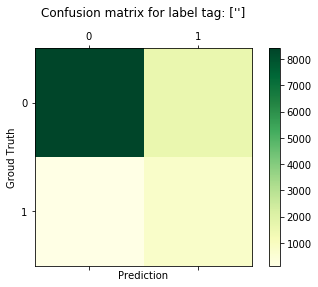

In [49]:
cm_plot(13,'')

[[6782 3334]
 [  60  744]]


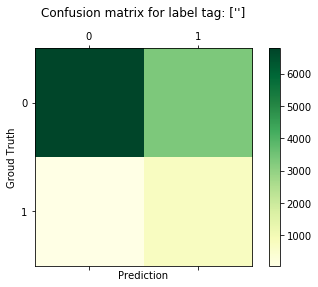

In [50]:
cm_plot(671,'')

[[7043 3150]
 [ 172  555]]


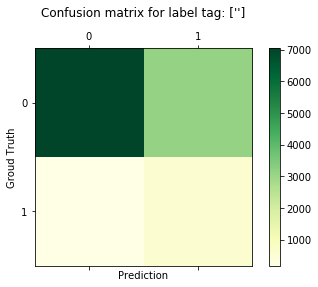

In [51]:
cm_plot(51,'')

[[8535 1650]
 [  84  651]]


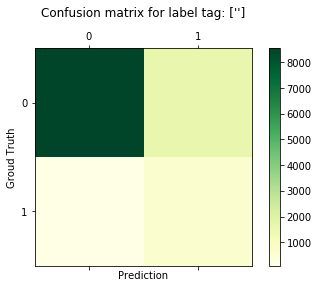

In [52]:
cm_plot(194,'')

[[6660 3573]
 [  83  604]]


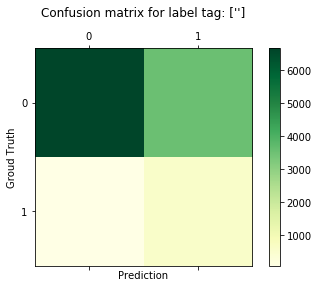

In [53]:
cm_plot(1059,'')

[[7670 2546]
 [  32  672]]


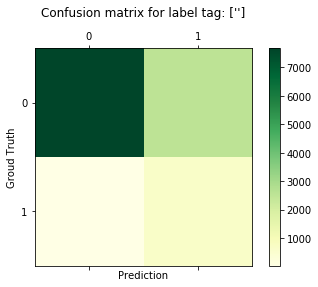

In [54]:
cm_plot(121,'')

[[10663   124]
 [    1   132]]


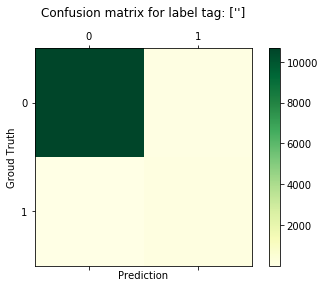

In [55]:
cm_plot(405,'')